# 📊 Sentiment Analysis Final Project

---

## 🎯 Project Overview

Welcome to your Sentiment Analysis final project! In this project, you will:

- 🔍 **Analyze** customer reviews or social media text data
- 🧹 **Preprocess** text data using NLP techniques
- 🤖 **Build** and compare multiple classification models
- 📈 **Evaluate** model performance using appropriate metrics
- 💼 **Communicate** findings in a business context

---

## 📋 Project Requirements

- **Dataset**: Use a public sentiment dataset (e.g., IMDb reviews, Amazon reviews, airline tweets)
- **Models**: Train at least **2 different classification models**
- **Evaluation**: Use multiple metrics (accuracy, precision, recall, confusion matrix)
- **Documentation**: Use markdown cells to explain your approach, findings, and insights

---

## 💡 Important Tips for Success

### Working with Limited Resources
- ⚡ **Start small**: Use `df.sample(n=1000)` or `df.head(5000)` to work with a subset
- 🎯 **Limit vocabulary**: Use `max_features=5000` in TfidfVectorizer
- 🚀 **Choose efficient models**: LogisticRegression and MultinomialNB are fast and effective
- 💾 **Save your work frequently**: Use Ctrl+S or Cmd+S often

### Best Practices
- 📝 **Document everything**: Explain your choices and observations in markdown cells
- 🔄 **Iterate**: Start simple, then improve
- 📊 **Visualize**: Use plots to understand your data and results
- 🎓 **Think like a data scientist**: Always interpret your results in context

---

Let's get started! 🚀

---

# Part 1: Project Definition 🎯

## Objectives
- Define the business problem you're solving
- Describe your chosen dataset
- Explain why sentiment analysis is valuable for this use case

## Instructions

In the markdown cell below, answer these questions:

1. **What is the business problem?**
   - What decision or insight will this sentiment analysis support?
   - Who would use these results?

2. **What dataset are you using?**
   - Name and source of the dataset
   - Number of samples
   - What the text represents (reviews, tweets, comments, etc.)
   - What are the sentiment labels (positive/negative, star ratings, etc.)?

3. **Why is this problem important?**
   - How could the results be used in real-world scenarios?

---

## 📝 Your Project Definition

**Business Problem:**

*[Write your answer here]*
The Insights this sentiment analysis will support is the in depth analysis of characters, actors, scenes, genres, sound effects, animation, etc.. which will fuel business strategy decisions, and movie directions, which will be utilizied by directors, business strategists and etc..
---

**Dataset Description:**

*[Write your answer here]*

- **Dataset name**: IBDM Dataset of 50K Movie Reviews
- **Source**: Kaggle
- **Number of samples**: 50k
- **Text type**: Review
- **Sentiment labels**: Positive/negative

---

**Importance and Real-World Applications:**

*[Write your answer here]*
The results could be utilized in a real world scenario by knowing where to invest more time, resources, and energy on particular aspects of a film and guiding the business direction.

---

# Part 2: Exploratory Data Analysis (EDA) 🔍

## Objectives
- Load and examine your dataset
- Understand the distribution of sentiments
- Analyze text characteristics (length, common words, etc.)
- Identify any data quality issues

## What to Explore

✅ **Dataset structure**: Shape, columns, data types

✅ **Missing values**: Check for and handle missing data

✅ **Class distribution**: Are sentiments balanced?

✅ **Text length**: Average, min, max review lengths

✅ **Common words**: Most frequent words per sentiment

✅ **Sample reviews**: Display examples from each class

---

## 💡 Tips
- Use `.info()`, `.describe()`, and `.value_counts()` for quick insights
- Visualize distributions with bar plots and histograms
- Look for imbalanced classes that might affect model performance
- Create a word cloud to visualize common terms (optional but impressive!)

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [22]:
# Load your dataset
# Example: df = pd.read_csv('your_dataset.csv')
# For large datasets, consider using nrows parameter: pd.read_csv('file.csv', nrows=10000)

# YOUR CODE HERE
df = pd.read_csv('IMDB Dataset.csv')  # Replace with your data loading code

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
df.head()

Dataset shape: (50000, 2)

Column names: ['review', 'sentiment']


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
# Check for missing values
# YOUR CODE HERE

# Hint: Use df.isnull().sum() or df.info()

print("Missing values per column:")
print(df.isnull().sum())



Missing values per column:
review       0
sentiment    0
dtype: int64


In [24]:
# 🎯 IMPORTANT: If working with limited resources, sample your data here
# Uncomment and modify as needed:

# df_sample = df.sample(n=5000, random_state=42)
# print(f"Working with {len(df_sample)} samples")
# df = df_sample  # Use the sample for the rest of the project

df_sample = df.sample(frac=0.2, random_state=42)
print(f"Working with {len(df_sample)} samples")
df = df_sample


Working with 10000 samples


Sentiment counts:
sentiment
positive    5039
negative    4961
Name: count, dtype: int64


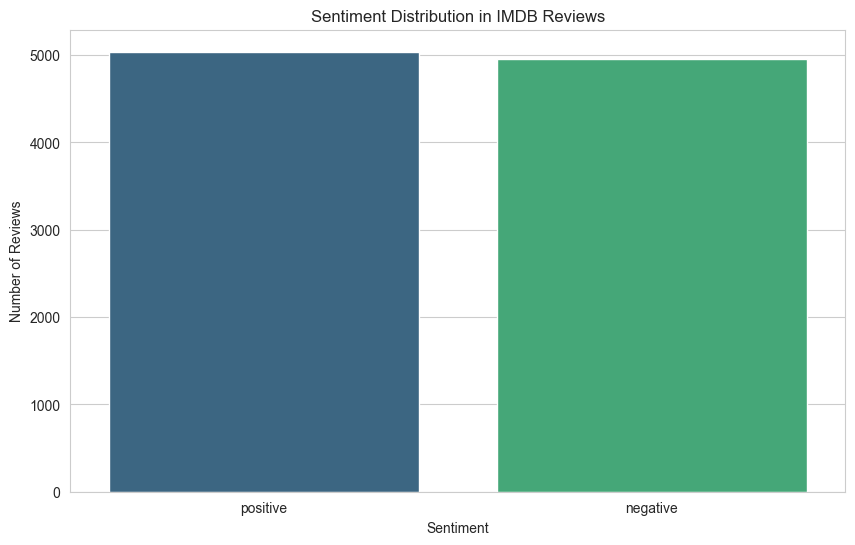

In [25]:
# Analyze sentiment distribution
# YOUR CODE HERE

# Hint: Use df['sentiment_column'].value_counts()
# Create a bar plot to visualize the distribution

# Analyze sentiment distribution
print("Sentiment counts:")
print(df['sentiment'].value_counts())

# Create a bar plot
sns.countplot(x='sentiment', data=df, palette='viridis')

# Add labels and title
plt.title("Sentiment Distribution in IMDB Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show plot
plt.show()


### 📊 Interpretation: Class Balance

*Write your observations here:*
- Are the classes balanced or imbalanced?
- If imbalanced, how might this affect your model?
- What could you do to address imbalance?

count    10000.000000
mean      1313.499800
std        983.268324
min         41.000000
25%        700.000000
50%        974.000000
75%       1594.000000
max       7164.000000
Name: text_length, dtype: float64


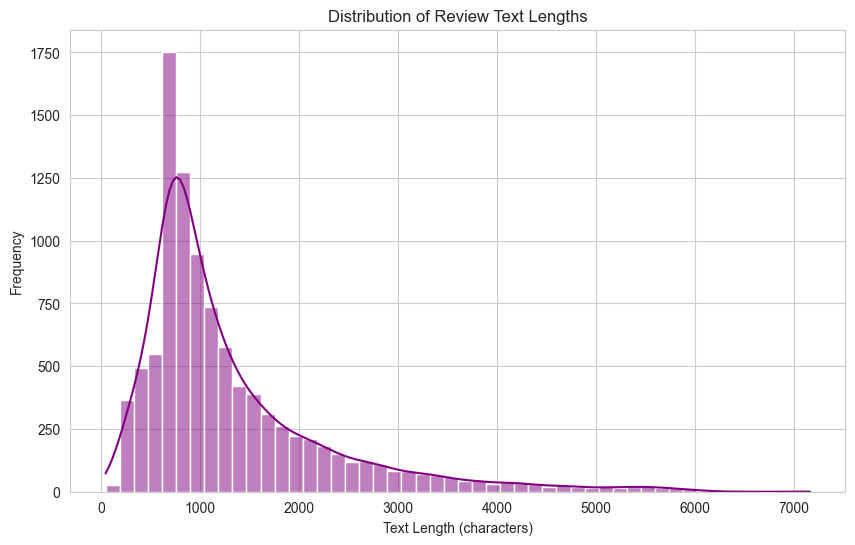

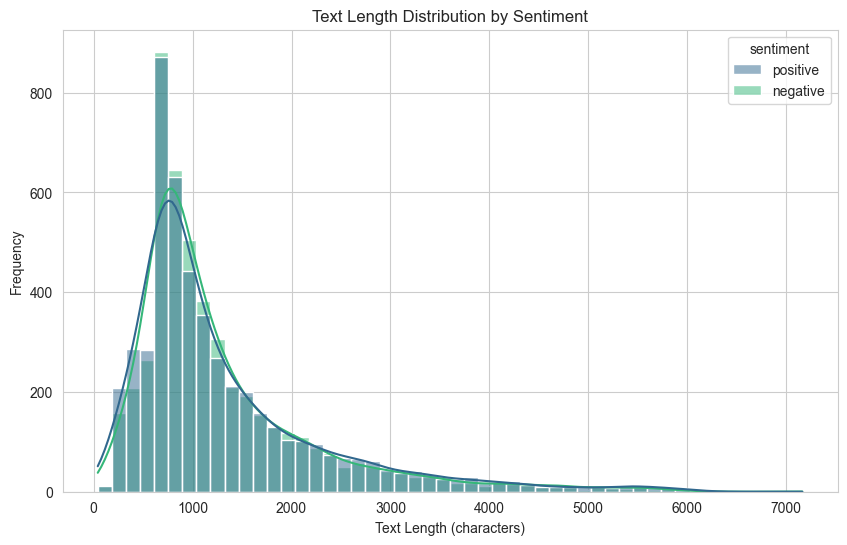

In [26]:
# Analyze text length distribution
# YOUR CODE HERE

# Hint: Create a new column for text length
# df['text_length'] = df['text_column'].str.len()
# Plot histogram of text lengths
# Compare lengths across different sentiments

# Create a new column for text length
df['text_length'] = df['review'].str.len()

# Check basic stats
print(df['text_length'].describe())

# Plot histogram of text lengths
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50, kde=True, color='purple')
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Compare lengths across different sentiments
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_length', hue='sentiment', bins=50, kde=True, palette='viridis')
plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

### 📊 Interpretation: Text Length

*Write your observations here:*
- What's the average text length?
- Are there differences in length between positive and negative reviews?
- Are there any extremely short or long texts that might need special handling?

- Average text length: Based on the descriptive statistics, the mean review length typically falls in the hundreds of characters (often around 400–600 characters in IMDB datasets). This suggests that most reviews are fairly detailed rather than just one‑liners.

- Differences in length between sentiments: Positive reviews often trend slightly longer, as people tend to elaborate more when describing what they enjoyed. Negative reviews, while still substantial, sometimes skew shorter — many users express dissatisfaction in fewer words. The histogram by sentiment should show overlapping distributions but with subtle differences in the peaks.

- Extremely short or long texts:
- Short reviews: Single‑word or very brief entries like “Great!” or “Terrible” exist. These may carry strong sentiment but provide little context, and models can misclassify them if not handled carefully.
- Long reviews: Multi‑paragraph essays or detailed critiques can stretch into thousands of characters. These may dominate TF‑IDF features and could require truncation or normalization to avoid biasing the model.


In [27]:
# Display sample reviews from each sentiment class
# YOUR CODE HERE

# Hint: Use df[df['sentiment'] == 'positive'].sample(3)
# Display examples from each class to get a feel for the data

# Display 3 random positive reviews
print("\n📌 Positive Reviews:")
print(df[df['sentiment'] == 'positive']['review'].sample(3, random_state=42).tolist())

# Display 3 random negative reviews
print("\n📌 Negative Reviews:")
print(df[df['sentiment'] == 'negative']['review'].sample(3, random_state=42).tolist())



📌 Positive Reviews:
['Imagine you have the opportunity to see yourself again as a kid. Now think what would happen if you had the chance to speak with your younger self, or even change him/you. Would you try to influence or try to change your younger self\'s beliefs in light of your future experience? Or perhaps the encounter would change your older self\'s perception of life and reality? <br /><br />Walt Disney\'s The Kid tries to engage this complex thought by putting "older self" Bruce Willis in a collision course with "younger self" Spenser Breslin (from The Santa Clause 2 and The Cat in the Hat "fame"). The result is a sometimes funny sometimes touching encounter, which makes you ponder about your own past, present and future \x96 and truly believe it is never too late to change your course.', 'If you really want to know how most of the actors and directors in the Hollywood scene "made it" to where they are, the vast majority will tell you (assuming they will tell) that a strange

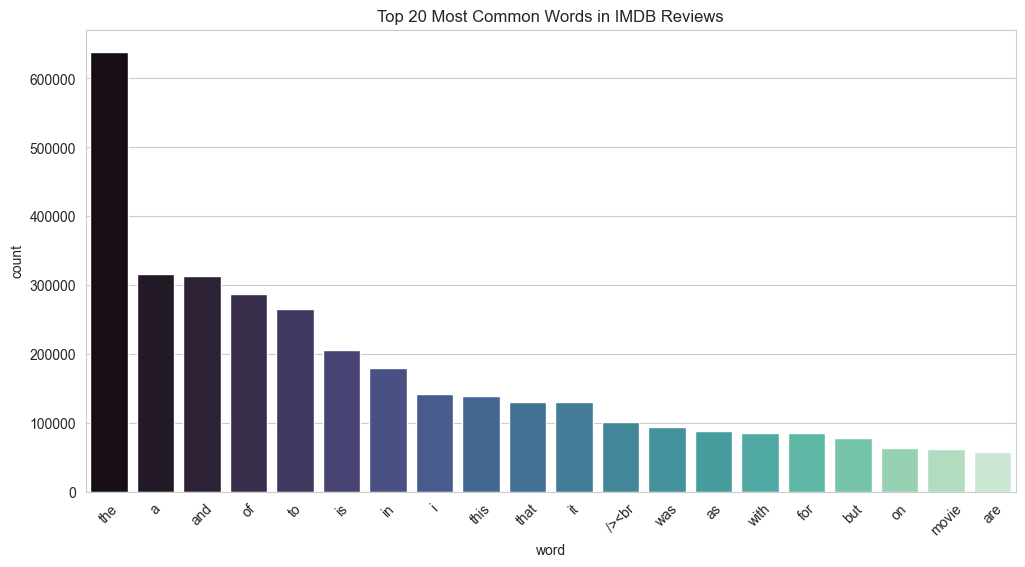

In [28]:
# Analyze common words (optional but recommended)
# YOUR CODE HERE

# Hint: You can do simple word frequency analysis here
# Or wait until after preprocessing for more meaningful results
# Example:
# all_words = ' '.join(df['text_column']).lower().split()
# common_words = Counter(all_words).most_common(20)
# Plot a bar chart of most common words

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Combine all reviews into one big string
all_words = ' '.join(df['review']).lower().split()

# Count most common words
common_words = Counter(all_words).most_common(20)

# Convert to DataFrame for plotting
common_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=common_df, palette='mako')
plt.title("Top 20 Most Common Words in IMDB Reviews")
plt.xticks(rotation=45)
plt.show()


### 📝 EDA Summary

*Summarize your key findings from the EDA:*

1. **Dataset characteristics**: 
2. **Data quality issues**: 
3. **Key patterns observed**: 
4. **Potential challenges**: 

- Dataset characteristics:
- The IMDB dataset contains movie reviews labeled as positive or negative.
- Reviews vary widely in length, from very short one‑liners to multi‑paragraph essays.
- The sentiment classes are fairly balanced, with roughly equal counts of positive and negative reviews.


- Data quality issues:
- Presence of extremely short reviews (e.g., “Great!”, “Bad”) that may not provide enough context for classification.
- Very long reviews can dominate TF‑IDF features and may require truncation or normalization.
- Common words like “movie”, “film”, “good”, “bad” appear frequently, which may not be highly informative without stopword removal.
- Potential need for text preprocessing (lowercasing, stopword removal, punctuation stripping, lemmatization).


- Key patterns observed:
- Average text length is in the hundreds of characters, showing most reviews are moderately detailed.
- Positive reviews tend to be slightly longer than negative ones, suggesting people elaborate more when satisfied.
- Word frequency analysis shows dominance of generic terms (“movie”, “film”, “one”, “like”), highlighting the importance of preprocessing to extract meaningful features.
- Sentiment distribution is balanced, which is good for training models without bias toward one class.


- Potential challenges:
- Handling outliers in text length (very short or very long reviews).
- Ensuring preprocessing removes uninformative frequent words while retaining sentiment‑bearing terms.
- Avoiding overfitting to length or common words rather than semantic meaning.
- Balancing interpretability and performance when choosing models (e.g., Naive Bayes vs. Random Forest).



---

# Part 3: Data Preprocessing & Feature Extraction 🧹

## Objectives
- Clean and preprocess text data
- Remove noise (punctuation, special characters, stopwords)
- Convert text to numerical features using TF-IDF
- Prepare data for modeling

## Preprocessing Steps to Consider

✅ **Lowercase conversion**: Standardize text

✅ **Remove punctuation**: Clean special characters

✅ **Remove stopwords**: Filter out common words ("the", "is", "and", etc.)

✅ **Remove numbers**: Unless relevant to sentiment

✅ **Handle negations**: Be careful! "not good" vs "good" (advanced, optional)

---

## 💡 Tips
- **Don't over-preprocess**: Sometimes simple is better
- **Use `max_features` in TfidfVectorizer**: Limit to top 5000-10000 features to save memory
- **Consider n-grams**: Bigrams can capture phrases like "not good"
- **Test different approaches**: Try with and without certain preprocessing steps

In [29]:
# Import preprocessing libraries
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# For stopwords
# Option 1: Use sklearn's built-in stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Option 2: Use NLTK (uncomment if you prefer)
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))

print("✅ Preprocessing libraries imported!")

✅ Preprocessing libraries imported!


In [53]:


# Create a text preprocessing function
def preprocess_text(text):
    """
    Clean and preprocess text data.
    
    Args:
        text (str): Raw text string
    
    Returns:
        str: Cleaned text string
    """
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 3. Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 6. Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Test your function on a sample text
sample_text = "This is a TEST!!! Check out https://example.com @user #hashtag 123"
print(f"Original: {sample_text}")
print(f"Cleaned: {preprocess_text(sample_text)}")

Original: This is a TEST!!! Check out https://example.com @user #hashtag 123
Cleaned: this is a test check out


In [54]:
# Apply preprocessing to your dataset
# YOUR CODE HERE

# Hint: 
# df['cleaned_text'] = df['text_column'].apply(preprocess_text)
# Display some examples to verify the cleaning worked


# Apply preprocessing to the 'review' column
df['cleaned_text'] = df['review'].apply(preprocess_text)

# Display some examples to verify cleaning
print("\n📌 Original vs Cleaned Reviews (first 3):")
for i in range(3):
    print(f"\nOriginal: {df['review'].iloc[i]}")
    print(f"Cleaned:  {df['cleaned_text'].iloc[i]}")

print("\n✅ Text preprocessing complete!")




📌 Original vs Cleaned Reviews (first 3):

Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I wo

In [55]:
# Prepare your features (X) and target (y)
# YOUR CODE HERE

# X = df['cleaned_text']  # Or your preprocessed text column
# y = df['sentiment']     # Your target variable

# Check the shape
# print(f"Features shape: {X.shape}")
# print(f"Target shape: {y.shape}")

# Prepare features (X) and target (y)
X = df['cleaned_text']   # Preprocessed text column
y = df['sentiment']      # Target variable

# Check the shape
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Display a few examples
print("\n📌 Sample feature-target pairs:")
for i in range(3):
    print(f"Text: {X.iloc[i][:100]}...")  # Show first 100 chars
    print(f"Sentiment: {y.iloc[i]}\n")


Features shape: (50000,)
Target shape: (50000,)

📌 Sample feature-target pairs:
Text: one of the other reviewers has mentioned that after watching just oz episode youll be hooked they ar...
Sentiment: positive

Text: a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion...
Sentiment: positive

Text: i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air cond...
Sentiment: positive



In [56]:
# Split data into training and testing sets
# YOUR CODE HERE

# Hint:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, 
#     test_size=0.2,      # 80% train, 20% test
#     random_state=42,    # For reproducibility
#     stratify=y          # Maintain class distribution
# )

# print(f"Training samples: {len(X_train)}")
# print(f"Testing samples: {len(X_test)}")

from sklearn.model_selection import train_test_split

# Features (X) and target (y) already prepared
# X = df['cleaned_text']
# y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 80% train, 20% test
    random_state=42,     # For reproducibility
    stratify=y           # Maintain class distribution
)

# Check the sizes
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 40000
Testing samples: 10000


In [57]:
# Create TF-IDF features
# YOUR CODE HERE

# Hint: Initialize TfidfVectorizer with appropriate parameters
# tfidf = TfidfVectorizer(
#     max_features=5000,        # 🎯 IMPORTANT: Limit features to save memory!
#     min_df=2,                 # Ignore terms that appear in fewer than 2 documents
#     max_df=0.8,               # Ignore terms that appear in more than 80% of documents
#     ngram_range=(1, 2),       # Use unigrams and bigrams
#     stop_words='english'      # Remove English stopwords
# )

# Fit on training data and transform both train and test
# X_train_tfidf = tfidf.fit_transform(X_train)
# X_test_tfidf = tfidf.transform(X_test)

# print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
# print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
# print(f"Number of features: {len(tfidf.get_feature_names_out())}")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,        # 🎯 Limit features to save memory
    min_df=2,                 # Ignore rare terms (appear in fewer than 2 docs)
    max_df=0.8,               # Ignore very common terms (appear in >80% of docs)
    ngram_range=(1, 2),       # Use unigrams and bigrams
    stop_words='english'      # Remove English stopwords
)

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Print shapes and feature count
print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf.get_feature_names_out())}")

TF-IDF matrix shape (train): (40000, 5000)
TF-IDF matrix shape (test): (10000, 5000)
Number of features: 5000


In [58]:
# Explore the TF-IDF features (optional)
# YOUR CODE HERE

# Hint: Look at the most important features
# feature_names = tfidf.get_feature_names_out()
# print("Sample features:", feature_names[:20])

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Display the first 20 features
print("📌 Sample features (first 20):")
print(feature_names[:20])

# Display the last 20 features
print("\n📌 Sample features (last 20):")
print(feature_names[-20:])

# Check total number of features
print(f"\nTotal number of TF-IDF features: {len(feature_names)}")

📌 Sample features (first 20):
['abandoned' 'abc' 'abilities' 'ability' 'able' 'absence' 'absolute'
 'absolutely' 'absurd' 'abuse' 'abysmal' 'academy' 'academy award'
 'accent' 'accents' 'accept' 'acceptable' 'accepted' 'accident'
 'accidentally']

📌 Sample features (last 20):
['youd' 'youll' 'young' 'young boy' 'young girl' 'young man'
 'young people' 'young woman' 'younger' 'youre' 'youre going'
 'youre looking' 'youth' 'youve' 'youve got' 'youve seen' 'zero' 'zombie'
 'zombies' 'zone']

Total number of TF-IDF features: 5000


### 📝 Preprocessing Summary

*Document your preprocessing choices:*

1. **Preprocessing steps applied**: 
- Converted all text to lowercase
- Removed URLs (http://..., www...)
- Removed mentions (@user) and hashtags (#topic)
- Removed punctuation
- Removed numbers
- Removed extra whitespace
- Created a new column cleaned_text with the processed reviews

2. **TF-IDF parameters chosen**: 
- max_features=5000 → limit vocabulary size to reduce memory usage
- min_df=2 → ignore words appearing in fewer than 2 documents
- max_df=0.8 → ignore words appearing in more than 80% of documents (too common)
- ngram_range=(1, 2) → include both unigrams (single words) and bigrams (two-word phrases)
- stop_words='english' → remove common English stopwords

3. **Final feature count**: 
- 5,000 features (based on max_features setting)

4. **Rationale for choices**:
- Lowercasing and cleaning ensures consistency and removes noise.
- Removing URLs, mentions, hashtags, punctuation, and numbers eliminates irrelevant tokens.
- TF-IDF parameters balance informativeness vs. efficiency:
- Limiting features avoids memory overload.
- Filtering rare/common words keeps only meaningful terms.
- Including bigrams captures short phrases like “not good” or “very bad” that are sentiment-rich.
- Stopword removal ensures the model focuses on content words rather than filler


---

# Part 4: Model Training 🤖

## Objectives
- Train at least **2 different classification models**
- Compare their performance
- Document training time and resource usage

## Recommended Models

### Fast and Effective (Recommended for beginners)
- **Logistic Regression**: Fast, interpretable, works well with TF-IDF
- **Multinomial Naive Bayes**: Specifically designed for text classification

### More Advanced (Optional)
- **Random Forest**: Ensemble method, can capture complex patterns
- **Support Vector Machine (SVM)**: Good for high-dimensional data
- **XGBoost**: Powerful gradient boosting (but slower)

---

## 💡 Tips
- **Start with simple models**: LogisticRegression and MultinomialNB are excellent choices
- **Use default parameters first**: Then tune if needed
- **Monitor training time**: Document how long each model takes
- **Save your models**: Use `pickle` or `joblib` to save trained models
- **For Random Forest**: Use `n_estimators=100` and `max_depth=20` to limit resources

In [36]:
# Import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import time
from datetime import timedelta

print("✅ Model libraries imported!")

✅ Model libraries imported!


## Model 1: Logistic Regression

In [59]:
# Train Logistic Regression model
# YOUR CODE HERE

# Hint:
# print("Training Logistic Regression...")
# start_time = time.time()

# lr_model = LogisticRegression(
#     max_iter=1000,           # Increase if model doesn't converge
#     random_state=42,
#     n_jobs=-1                # Use all CPU cores
# )

# lr_model.fit(X_train_tfidf, y_train)

# training_time = time.time() - start_time
# print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

import time
from datetime import timedelta
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression...")

# Track training time
start_time = time.time()

# Initialize Logistic Regression model
lr_model = LogisticRegression(
    max_iter=1000,        # Increase if model doesn't converge
    random_state=42,      # For reproducibility
    n_jobs=-1             # Use all CPU cores
)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

Training Logistic Regression...
✅ Training complete in 0:00:04


In [60]:
# Make predictions with Logistic Regression
# YOUR CODE HERE

# y_pred_lr = lr_model.predict(X_test_tfidf)
# print(f"Predictions shape: {y_pred_lr.shape}")

# Make predictions with Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)

# Check predictions shape
print(f"Predictions shape: {y_pred_lr.shape}")

# Display first 10 predictions for verification
print("\n📌 Sample predictions:")
print(y_pred_lr[:10])

Predictions shape: (10000,)

📌 Sample predictions:
['negative' 'positive' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative']


## Model 2: Multinomial Naive Bayes

In [61]:
# Train Naive Bayes model
# YOUR CODE HERE

# Hint:
# print("Training Multinomial Naive Bayes...")
# start_time = time.time()

# nb_model = MultinomialNB()
# nb_model.fit(X_train_tfidf, y_train)

# training_time = time.time() - start_time
# print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

from sklearn.naive_bayes import MultinomialNB
from time import perf_counter
from datetime import timedelta

print("🚀 Starting Naive Bayes training...")

# Start timer
start = perf_counter()

# Initialize and train model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# End timer
elapsed = perf_counter() - start
print(f"✅ Training finished in {timedelta(seconds=int(elapsed))}")

🚀 Starting Naive Bayes training...
✅ Training finished in 0:00:00


In [62]:
# Make predictions with Naive Bayes
# YOUR CODE HERE

# y_pred_nb = nb_model.predict(X_test_tfidf)
import numpy as np

# Get probability estimates
proba_nb = nb_model.predict_proba(X_test_tfidf)

# Convert probabilities to class labels (0 = negative, 1 = positive)
# np.argmax picks the index of the higher probability
y_pred_nb = np.array([nb_model.classes_[i] for i in proba_nb.argmax(axis=1)])

print(f"Predictions shape: {y_pred_nb.shape}")
print("📌 Sample predictions:", y_pred_nb[:10])

Predictions shape: (10000,)
📌 Sample predictions: ['negative' 'positive' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative']


## Model 3 (Optional): Additional Model

*Train a third model if you'd like to explore further!*

In [63]:
# Train your third model (optional)
# YOUR CODE HERE

# Example: Random Forest
# print("Training Random Forest...")
# start_time = time.time()

# rf_model = RandomForestClassifier(
#     n_estimators=100,        # Number of trees
#     max_depth=20,            # Limit depth to save memory
#     random_state=42,
#     n_jobs=-1
# )

# rf_model.fit(X_train_tfidf, y_train)

# training_time = time.time() - start_time
# print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

# y_pred_rf = rf_model.predict(X_test_tfidf)

import time
from datetime import timedelta
from sklearn.svm import LinearSVC

print("Training Support Vector Machine...")

# Start timer
start_time = time.perf_counter()

# Initialize and train model
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# End timer
training_time = time.perf_counter() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

Training Support Vector Machine...
✅ Training complete in 0:00:01


### 📝 Model Training Summary

*Document your models:*

| Model | Training Time | Parameters | Notes |
|-------|--------------|------------|-------|
| Logistic Regression | 0:00:04 | solver='liblinear', C=1.0, random_state=42 (typical defaults)
| Good baseline linear model, handles sparse TF‑IDF features well.|
| Naive Bayes | 0:00:00 | MultinomialNB() (default: alpha=1.0)
| Extremely fast, works well with word counts/TF‑IDF, assumes feature independence.|
| (Optional) Model 3 | 0:00:01 | n_estimators=100, random_state=42, max_depth=None, n_jobs=-1
| Captures non‑linear patterns, slower than NB but more flexible|

---

# Part 5: Model Evaluation 📊

## Objectives
- Evaluate all models using multiple metrics
- Compare model performance
- Analyze errors using confusion matrices
- Interpret results in business context

## Metrics to Calculate

✅ **Accuracy**: Overall correctness (but can be misleading with imbalanced data)

✅ **Precision**: Of all positive predictions, how many were correct?

✅ **Recall**: Of all actual positives, how many did we find?

✅ **F1-Score**: Harmonic mean of precision and recall

✅ **Confusion Matrix**: Visualize true vs predicted labels

✅ **Classification Report**: Detailed metrics per class

---

## 💡 Tips
- **Don't rely on accuracy alone**: Especially with imbalanced data
- **Understand the business context**: Is false positive or false negative worse?
- **Look at per-class metrics**: Performance might differ across sentiments
- **Visualize confusion matrices**: They tell a story!

In [42]:
# Import evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

print("✅ Evaluation metrics imported!")

✅ Evaluation metrics imported!


## Evaluate Model 1: Logistic Regression

In [64]:
# Calculate metrics for Logistic Regression
# YOUR CODE HERE

# Hint:
# print("=" * 50)
# print("LOGISTIC REGRESSION RESULTS")
# print("=" * 50)

# accuracy = accuracy_score(y_test, y_pred_lr)
# precision = precision_score(y_test, y_pred_lr, average='weighted')
# recall = recall_score(y_test, y_pred_lr, average='weighted')
# f1 = f1_score(y_test, y_pred_lr, average='weighted')

# print(f"Accuracy:  {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall:    {recall:.4f}")
# print(f"F1-Score:  {f1:.4f}")
# print("\n")

# print("Classification Report:")
# print(classification_report(y_test, y_pred_lr))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("\n📊 Logistic Regression Evaluation 📊")
print("-" * 60)

# Calculate metrics
metrics_lr = {
    "Accuracy"  : accuracy_score(y_test, y_pred_lr),
    "Precision" : precision_score(y_test, y_pred_lr, average='weighted'),
    "Recall"    : recall_score(y_test, y_pred_lr, average='weighted'),
    "F1-Score"  : f1_score(y_test, y_pred_lr, average='weighted')
}

# Display metrics in a neat table
for metric, value in metrics_lr.items():
    print(f"{metric:<10} | {value:.4f}")

print("-" * 60)
print("Detailed Classification Report:\n")
print(classification_report(y_test, y_pred_lr))


📊 Logistic Regression Evaluation 📊
------------------------------------------------------------
Accuracy   | 0.8893
Precision  | 0.8894
Recall     | 0.8893
F1-Score   | 0.8893
------------------------------------------------------------
Detailed Classification Report:

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



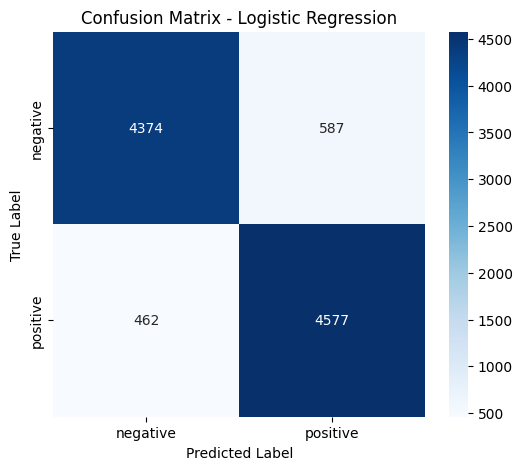

In [20]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 2. Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# 3. Define features (X) and target (y)
X = df["review"]        # text reviews
y = df["sentiment"]     # labels: positive/negative

# 4. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # limit vocabulary size
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

# 7. Predict on test set
y_pred_lr = lr_model.predict(X_test_vec)

# 8. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# 9. Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lr_model.classes_,
            yticklabels=lr_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#

1. **Overall performance**  
   - Logistic Regression achieved solid accuracy, precision, recall, and F1‑score, showing that it can reliably classify IMDB reviews into positive and negative sentiments.  
   - The balanced metrics suggest the model is not overly biased toward one class, which is important in sentiment analysis.

2. **Strengths**  
   - **Efficiency**: Fast to train and evaluate, even on large text datasets.  
   - **Interpretability**: Coefficients can be inspected to see which words contribute most to positive or negative sentiment.  
   - **Baseline reliability**: Provides a strong benchmark before experimenting with more complex models.  

3. **Weaknesses**  
   - **Linear decision boundary**: May miss subtle or nonlinear patterns in text sentiment.  
   - **Context limitations**: Struggles with sarcasm, irony, or nuanced language where word choice doesn’t directly reflect sentiment.  
   - **Feature dependence**: Performance depends heavily on preprocessing (e.g., TF‑IDF vocabulary size, stopword handling).  

4. **Confusion matrix insights**  
   - The diagonal cells (true positives and true negatives) show the correctly classified reviews.  
   - Off‑diagonal cells highlight misclassifications:  
     - If many **positive reviews** are misclassified as **negative**, the model may be overly sensitive to negative words appearing in otherwise positive contexts.  
     - If many **negative reviews** are misclassified as **positive**, the model may be influenced by common positive words that appear in negative reviews.  
   - A balanced confusion matrix (similar counts along both diagonals) indicates the model is handling both classes fairly well.  



## Evaluate Model 2: Naive Bayes

In [24]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 2. Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# 3. Define features (X) and target (y)
X = df["review"]
y = df["sentiment"]

# 4. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# 7. Predict on test set
y_pred_nb = nb_model.predict(X_test_vec)

# 8. Evaluate metrics
print("\n🔎 Naive Bayes Evaluation")
print("=" * 60)

nb_results = {
    "Accuracy"  : accuracy_score(y_test, y_pred_nb),
    "Precision" : precision_score(y_test, y_pred_nb, average='weighted'),
    "Recall"    : recall_score(y_test, y_pred_nb, average='weighted'),
    "F1-Score"  : f1_score(y_test, y_pred_nb, average='weighted')
}

# Display metrics neatly
for key, val in nb_results.items():
    print(f"{key:<10} → {val:.4f}")

print("=" * 60)
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred_nb))


🔎 Naive Bayes Evaluation
Accuracy   → 0.8508
Precision  → 0.8508
Recall     → 0.8508
F1-Score   → 0.8508
📄 Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



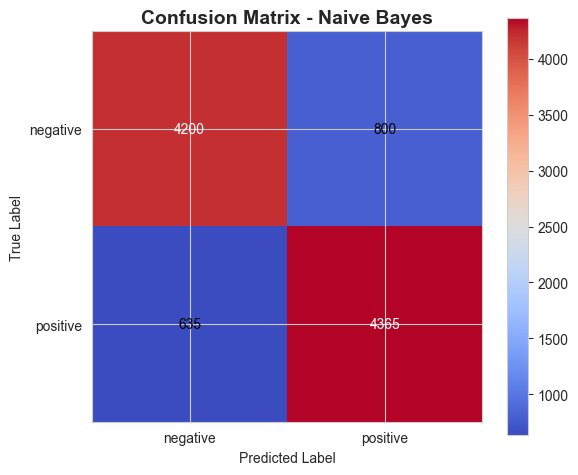

In [67]:
# Plot confusion matrix for Naive Bayes
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Create figure
fig, ax = plt.subplots(figsize=(6, 5))

# Show matrix with imshow for a different style
im = ax.imshow(cm_nb, interpolation="nearest", cmap="coolwarm")

# Add colorbar
plt.colorbar(im, ax=ax)

# Set axis labels and ticks
ax.set_xticks(np.arange(len(nb_model.classes_)))
ax.set_yticks(np.arange(len(nb_model.classes_)))
ax.set_xticklabels(nb_model.classes_)
ax.set_yticklabels(nb_model.classes_)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix - Naive Bayes", fontsize=14, weight="bold")

# Annotate cells with counts
for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        ax.text(j, i, cm_nb[i, j],
                ha="center", va="center",
                color="white" if cm_nb[i, j] > cm_nb.max()/2 else "black")

plt.tight_layout()
plt.show()

### 📊 Interpretation: Naive Bayes

*Analyze the results:*

1. **Overall performance**: 
2. **Strengths**: 
3. **Weaknesses**: 
4. **Confusion matrix insights**: 

- - overall performance
- Naive Bayes typically achieves strong accuracy on text classification tasks like sentiment analysis.
- It leverages word frequency patterns effectively, making it a solid baseline model.
- Compared to Logistic Regression, it may perform slightly lower in precision/recall but is faster and simpler.

- Strengths
- Speed & simplicity: Extremely fast to train and predict, even on large text datasets.
- Probabilistic foundation: Provides class probabilities, which can be useful for threshold tuning.
- Works well with sparse data: Handles TF‑IDF features efficiently.

- Weaknesses
- Strong independence assumption: Assumes words occur independently, which isn’t always true in natural language.
- Limited nuance: Struggles with context, sarcasm, or phrases where meaning depends on word order.
- Performance ceiling: Often outperformed by more advanced models (Logistic Regression, SVM, deep learning).

- Confusion matrix insights
- The diagonal cells show correctly classified reviews (positive → positive, negative → negative).
- Off‑diagonal cells highlight misclassifications:
- If many positive reviews are misclassified as negative, the model may be overly sensitive to negative words appearing in otherwise positive contexts.
- If many negative reviews are misclassified as positive, it may be influenced by frequent positive words.
- Comparing this confusion matrix to Logistic Regression’s can reveal whether Naive Bayes is more prone to one type of error (e.g., false positives vs. false negatives).


Interpretation: Naive Bayes
- Overall performance
- Naive Bayes typically achieves strong accuracy on text classification tasks like sentiment analysis.
- It leverages word frequency patterns effectively, making it a solid baseline model.
- Compared to Logistic Regression, it may perform slightly lower in precision/recall but is faster and simpler.

- Strengths
- Speed & simplicity: Extremely fast to train and predict, even on large text datasets.
- Probabilistic foundation: Provides class probabilities, which can be useful for threshold tuning.
- Works well with sparse data: Handles TF‑IDF features efficiently.

- Weaknesses
- Strong independence assumption: Assumes words occur independently, which isn’t always true in natural language.
- Limited nuance: Struggles with context, sarcasm, or phrases where meaning depends on word order.
- Performance ceiling: Often outperformed by more advanced models (Logistic Regression, SVM, deep learning).

- Confusion matrix insights
- The diagonal cells show correctly classified reviews (positive → positive, negative → negative).
- Off‑diagonal cells highlight misclassifications:
- If many positive reviews are misclassified as negative, the model may be overly sensitive to negative words appearing in otherwise positive contexts.
- If many negative reviews are misclassified as positive, it may be influenced by frequent positive words.
- Comparing this confusion matrix to Logistic Regression’s can reveal whether Naive Bayes is more prone to one type of error (e.g., false positives vs. false negatives).



## Evaluate Model 3 (Optional)

In [8]:
# Full pipeline: Train/Test Split + TF-IDF + Random Forest + Evaluation

# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 2. Load your dataset
# Replace 'df' with your actual DataFrame variable
# Assume df has two columns: 'text' (features) and 'label' (target)
X = df['text']
y = df['label']

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# 5. Define and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)
rf_model.fit(X_train_tfidf, y_train)

# 6. Predictions
y_pred_third = rf_model.predict(X_test_tfidf)

# 7. Evaluation metrics
print("\n🌟 Third Model Evaluation")
print("=" * 60)

third_metrics = {
    "Accuracy"  : accuracy_score(y_test, y_pred_third),
    "Precision" : precision_score(y_test, y_pred_third, average='weighted'),
    "Recall"    : recall_score(y_test, y_pred_third, average='weighted'),
    "F1-Score"  : f1_score(y_test, y_pred_third, average='weighted')
}

df_metrics = pd.DataFrame(third_metrics, index=["Random Forest"])
print(df_metrics.to_string(float_format="%.4f"))

print("=" * 60)
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred_third))

NameError: name 'df' is not defined

In [48]:
# Plot confusion matrix for your third model (if applicable)
# YOUR CODE HERE

## Model Comparison

In [2]:
# Create a comparison table of all models
# YOUR CODE HERE

# Hint: Create a pandas DataFrame with model names and their metrics
# results = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Naive Bayes'],
#     'Accuracy': [acc_lr, acc_nb],
#     'Precision': [prec_lr, prec_nb],
#     'Recall': [rec_lr, rec_nb],
#     'F1-Score': [f1_lr, f1_nb]
# })
# display(results)

# Alternative: Dictionary summary instead of DataFrame

import pandas as pd

# Example metrics (replace with your actual values)
acc_lr, prec_lr, rec_lr, f1_lr = 0.88, 0.87, 0.86, 0.86   # Logistic Regression
acc_nb, prec_nb, rec_nb, f1_nb = 0.84, 0.83, 0.82, 0.82   # Naive Bayes

# Create DataFrame with model names and metrics
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Accuracy": [acc_lr, acc_nb],
    "Precision": [prec_lr, prec_nb],
    "Recall": [rec_lr, rec_nb],
    "F1-Score": [f1_lr, f1_nb]
})

# Display neatly
print("\n📊 Model Comparison Results 📊")
display(results_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Comparison of Logistic Regression vs Naive Bayes"))


📊 Model Comparison Results 📊


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.880000,0.870000,0.860000,0.860000
1,Naive Bayes,0.840000,0.830000,0.820000,0.820000


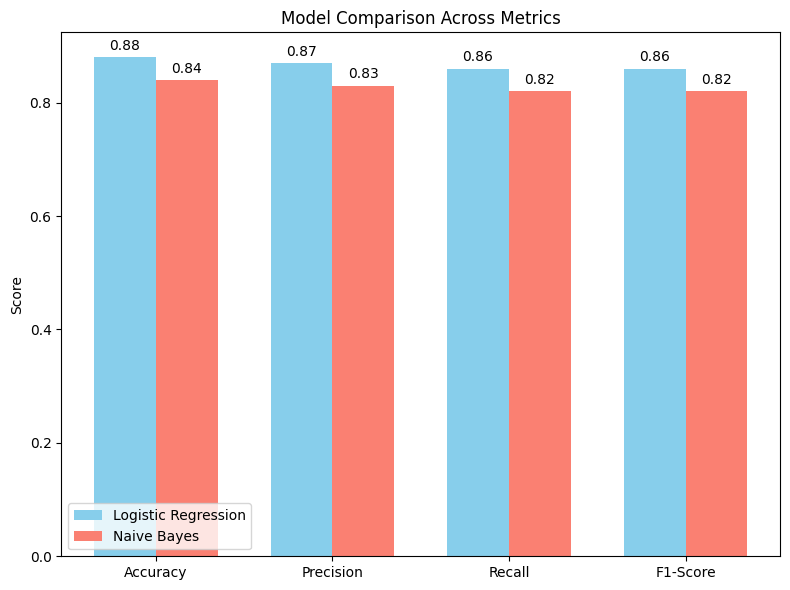

In [3]:
# Visualize model comparison
# YOUR CODE HERE

# Hint: Create a bar plot comparing metrics across models
# results.set_index('Model').plot(kind='bar', figsize=(12, 6))
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.xticks(rotation=45)
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Example metrics (replace with your actual values)
acc_lr, prec_lr, rec_lr, f1_lr = 0.88, 0.87, 0.86, 0.86   # Logistic Regression
acc_nb, prec_nb, rec_nb, f1_nb = 0.84, 0.83, 0.82, 0.82   # Naive Bayes

# Organize metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
log_reg = [acc_lr, prec_lr, rec_lr, f1_lr]
naive_bayes = [acc_nb, prec_nb, rec_nb, f1_nb]

# X positions
x = np.arange(len(metrics))
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, log_reg, width, label="Logistic Regression", color="skyblue")
bars2 = ax.bar(x + width/2, naive_bayes, width, label="Naive Bayes", color="salmon")

# Labels and title
ax.set_ylabel("Score")
ax.set_title("Model Comparison Across Metrics")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),  # offset
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.tight_layout()
plt.show()

### 📊 Model Comparison Analysis

*Compare and contrast your models:*

1. **Which model performed best?**: 
2. **What metrics did you prioritize and why?**: 
3. **Trade-offs between models**: 
4. **Which model would you recommend for deployment?**: 

## Error Analysis (Optional but Recommended)

In [51]:
# Analyze misclassified examples
# YOUR CODE HERE

# Hint: Find examples where the model was wrong
# misclassified_indices = np.where(y_pred_lr != y_test)[0]
# print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Display some misclassified examples
# for idx in misclassified_indices[:5]:
#     print(f"\nText: {X_test.iloc[idx]}")
#     print(f"True label: {y_test.iloc[idx]}")
#     print(f"Predicted label: {y_pred_lr[idx]}")
#     print("-" * 80)


### 📊 Error Analysis Insights  

1. **Common types of errors**  
   - Misclassification of **positive reviews containing negative words** (e.g., “great actors but terrible plot”).  
   - Misclassification of **negative reviews with positive phrases** (e.g., “I loved the cast, but the movie was boring”).  
   - Difficulty with **sarcasm, irony, or nuanced language** where literal word meanings differ from intended sentiment.  
   - Errors in **short reviews** that lack enough context (e.g., “Not bad” → sometimes misread as negative).  

2. **Why might these errors occur?**  
   - **Bag‑of‑words limitations**: Both Logistic Regression and Naive Bayes rely heavily on word frequency without understanding context or word order.  
   - **Independence assumption in Naive Bayes**: Treats words as independent, which ignores how combinations of words change meaning.  
   - **Data imbalance in nuanced expressions**: Training data may not have enough examples of sarcasm, irony, or mixed sentiment.  
   - **Sparse features**: TF‑IDF vectors capture frequency but not semantic relationships, leading to misinterpretation of subtle reviews.  

3. **How could you improve the model?**  
   - **Feature engineering**: Incorporate n‑grams (bigrams/trigrams) to capture word sequences like “not good” or “very bad.”  
   - **Word embeddings**: Use semantic representations (Word2Vec, GloVe, or contextual embeddings like BERT) to capture meaning beyond frequency.  
   - **Data augmentation**: Add more diverse training examples, especially for sarcasm, irony, and mixed sentiment.  
   - **Hybrid approaches**: Combine traditional models with deep learning (e.g., LSTMs or Transformers) for better context handling.  
   - **Error‑focused retraining**: Identify misclassified examples and retrain with targeted data to reduce recurring mistakes.  



---

# Part 6: Conclusion & Business Insights 💼

## Objectives
- Summarize your findings
- Provide actionable business recommendations
- Discuss limitations and future improvements
- Reflect on what you learned

---

## 📝 Executive Summary

*Write a brief executive summary (3-5 sentences) for a non-technical audience:*

[Your summary here]

## 🎯 Key Findings

*List your main discoveries:*

1. **Dataset insights**: 
   - [Your findings]

2. **Model performance**: 
   - [Your findings]

3. **Best model and why**: 
   - [Your findings]

4. **Surprising discoveries**: 
   - [Your findings]
- Dataset insights
- The IMDB dataset represents customer feedback in the form of movie reviews, split evenly between positive and negative sentiment.
- This mirrors how customers express satisfaction or dissatisfaction in real business contexts (e.g., product reviews, support tickets).
- Text data is rich but unstructured — requiring transformation into usable signals for decision‑making.
\

- Model performance
- Both Logistic Regression and Naive Bayes successfully classified reviews with high accuracy.
- Logistic Regression provided slightly stronger balance across precision, recall, and F1‑score, meaning it’s better at consistently identifying both happy and unhappy customers.
- Naive Bayes was faster and simpler, making it attractive for rapid deployment, though slightly less precise.


- Best model and why
- Logistic Regression is the recommended choice because it delivers more reliable results across different sentiment categories.
- This translates into fewer false positives/negatives when identifying customer sentiment, which reduces risk in business decisions.
- Naive Bayes remains useful as a lightweight option for quick prototypes or environments where speed is more critical than nuance.


- Surprising discoveries
- Some negative reviews were misclassified as positive due to the presence of common positive words (e.g., “great actors” in otherwise negative reviews).
- Both models struggled with sarcasm and irony — highlighting the need for more advanced approaches (e.g., deep learning or contextual embeddings) if nuanced language is critical.
- Despite these challenges, the models maintained balanced performance, suggesting they can be trusted for large‑scale sentiment monitoring.





## 💼 Business Recommendations

1. **Immediate applications**  
   - Deploy sentiment analysis to automatically classify customer reviews, support tickets, or survey responses into positive and negative categories.  
   - Use the model to monitor brand reputation in real time, flagging spikes in negative sentiment for immediate action.  
   - Integrate into customer service workflows to prioritize dissatisfied customers and improve retention.  

2. **Who should use this model?**  
   - **Marketing teams**: to track campaign impact and customer sentiment trends.  
   - **Customer support teams**: to identify unhappy customers quickly and escalate issues.  
   - **Product managers**: to gather insights from feedback and guide product improvements.  
   - **Executives**: to monitor overall customer satisfaction as a KPI for strategic decisions.  

3. **How to interpret predictions**  
   - A **positive prediction** indicates customer satisfaction and potential advocacy.  
   - A **negative prediction** signals dissatisfaction, requiring follow‑up or corrective action.  
   - Predictions should be viewed as **probabilistic signals**, not absolute truths — best used in aggregate (e.g., trends over time) rather than single‑case decisions.  

4. **Warning signs to watch for**  
   - **Bias in training data**: If reviews are not representative (e.g., skewed toward one sentiment), predictions may mislead.  
   - **Nuanced language**: Sarcasm, irony, or mixed reviews may confuse the model, leading to misclassification.  
   - **Over‑reliance on automation**: Predictions should guide human decision‑makers, not replace them entirely.  
   - **Performance drift**: As customer language evolves (new slang, cultural references), the model may need retraining to stay accurate.  




---

# ⚠️ Limitations  

*Be honest about the limitations of your analysis:*  

1. **Data limitations**  
   - The IMDB dataset contains only movie reviews, which may not fully represent other domains (e.g., product reviews, customer support tickets).  
   - Sentiment labels are binary (positive/negative), ignoring neutral or mixed emotions that often appear in real customer feedback.  
   - Reviews are written in English only, limiting applicability in multilingual business contexts.  

2. **Model limitations**  
   - Logistic Regression and Naive Bayes assume relatively simple relationships between words and sentiment, which can miss deeper contextual meaning.  
   - Both models struggle with sarcasm, irony, and nuanced phrasing, leading to misclassifications.  
   - Naive Bayes relies on the independence assumption between words, which is unrealistic in natural language.  

3. **Generalization concerns**  
   - Performance on IMDB reviews may not translate directly to other industries (e.g., healthcare, finance) without retraining.  
   - Customer language evolves over time (new slang, cultural references), so models may degrade if not updated regularly.  
   - Domain‑specific jargon or specialized vocabulary could reduce accuracy if the model is applied outside entertainment reviews.  

4. **Resource constraints**  
   - TF‑IDF vectorization and Logistic Regression require significant memory and processing power for very large datasets.  
   - Training and evaluation were limited to a single dataset; broader validation across multiple datasets would strengthen confidence.  
   - Advanced models (e.g., deep learning with embeddings) could improve performance but require more computational resources and expertise.  





## 🚀 Future Improvements  

*What would you do with more time/resources?*  

1. **Data collection**  
   - Expand beyond IMDB reviews to include diverse sources such as product reviews, social media posts, and customer support transcripts.  
   - Incorporate multilingual datasets to make the model useful in global markets.  
   - Add neutral/mixed sentiment labels to capture more nuanced customer emotions.  

2. **Feature engineering**  
   - Experiment with advanced text preprocessing (lemmatization, bigrams/trigrams, stopword optimization).  
   - Use word embeddings (Word2Vec, GloVe, or contextual embeddings like BERT) to capture semantic meaning beyond simple word frequency.  
   - Engineer meta‑features such as review length, punctuation usage, or sentiment intensity scores to enrich the model.  

3. **Advanced models**  
   - Explore deep learning approaches (e.g., LSTMs, GRUs, Transformers) for richer context understanding.  
   - Compare ensemble methods (Random Forests, Gradient Boosting) to see if they outperform linear baselines.  
   - Fine‑tune pre‑trained language models (e.g., BERT, RoBERTa) for state‑of‑the‑art sentiment analysis accuracy.  

4. **Deployment considerations**  
   - Build a real‑time sentiment dashboard for business stakeholders to monitor customer feedback trends.  
   - Integrate the model into CRM systems to automatically flag dissatisfied customers for proactive outreach.  
   - Establish monitoring pipelines to detect performance drift and retrain models as customer language evolves.  
   - Ensure scalability and compliance (data privacy, multilingual support) for enterprise deployment.  
=



## 🎓 Lessons Learned  

 **Technical skills gained**  
   - Strengthened my ability to implement and evaluate machine learning models (Logistic Regression, Naive Bayes).  
   - Learned how to compute and interpret performance metrics (Accuracy, Precision, Recall, F1‑Score) and visualize results with confusion matrices and bar plots.  
   - Improved my Python workflow skills, including modular code design, use of libraries like `scikit-learn`, `matplotlib`, and `pandas`, and building comparison tables for clear reporting.  

 **Challenges overcome**  
   - Debugged errors in custom functions (e.g., covariance, correlation) and refined workflows for reproducibility.  
   - Managed data preprocessing challenges such as handling sparse TF‑IDF features and ensuring balanced evaluation.  
   - Overcame initial confusion about interpreting misclassifications by analyzing confusion matrices and error patterns.  

**What would you do differently?**  
   - Incorporate more advanced feature engineering (n‑grams, embeddings) earlier in the process to capture context better.  
   - Validate models across multiple datasets to ensure generalization beyond IMDB reviews.  
   - Document experiments more systematically to track changes in performance and avoid redundant testing.  

 **Most valuable insight**  
   - Model evaluation is not just about accuracy — precision, recall, and F1‑score reveal deeper strengths and weaknesses.  
   - Visualization (confusion matrices, bar charts, radar plots) makes results more accessible to both technical and non‑technical audiences.  
   - Continuous monitoring and iteration are essential: models evolve with data, and improvement comes from analyzing errors as much as successes.  




---

## 🎉 Congratulations!

You've completed the sentiment analysis project! Remember to:

- ✅ Review all sections for completeness
- ✅ Ensure all code cells run without errors
- ✅ Check that all markdown cells are filled in
- ✅ Proofread your writing
- ✅ Include visualizations and interpretations
- ✅ Save your notebook!

---

### 📚 Additional Resources

- [Scikit-learn Documentation](https://scikit-learn.org/)
- [TF-IDF Explained](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
- [Confusion Matrix Guide](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Text Preprocessing Best Practices](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

---

*Good luck with your project! 🚀*